# Aula 1 - Análise Exploratória dos Dados

Primeiro, importaremos os dados usados.

In [29]:
import pandas as pd
df = pd.read_csv("https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv")
print("Dados lidos!")

Dados lidos!


# 1) Média da metragem para cada um dos bairros

In [30]:
df.groupby("Bairro")[["Metragem"]].mean()

Metragem
Bairro                       
Aclimação          253.056818
Alto da Boa Vista  418.875000
Alto da Lapa       294.337209
Alto da Mooca      270.050000
Alto de Pinheiros  433.444988
...                       ...
Vila Água Funda    152.200000
Água Branca        191.000000
Água Fria          165.416667
Água Funda         139.000000
Água Rasa          340.250000

[701 rows x 1 columns]

# 2) Duas formas de selecionar os dados por bairro

In [31]:
nome_do_bairro = "Planalto Paulista"

In [32]:
df[df["Bairro"] == nome_do_bairro]

Rua             Bairro     Cidade  Metragem  \
0             Avenida Itacira, 255   Planalto Paulista  São Paulo      1000   
75     Rua Francisco de Paula Brito  Planalto Paulista  São Paulo       250   
79              Rua Elisa Rodrigues  Planalto Paulista  São Paulo       184   
87                              NaN  Planalto Paulista  São Paulo       119   
116          Alameda dos Guainumbis  Planalto Paulista  São Paulo       200   
...                             ...                ...        ...       ...   
9878                            NaN  Planalto Paulista  São Paulo       200   
9883            Alameda dos Tupinas  Planalto Paulista  São Paulo       405   
9930                  Avenida Odila  Planalto Paulista  São Paulo       262   
9966                  Avenida Odila  Planalto Paulista  São Paulo       267   
10002                 Avenida Odila  Planalto Paulista  São Paulo       267   

       Quartos  Banheiros  Vagas         Valor  
0            4          8      6  R$ 7.000.000  
75           3          4      4  R$ 2.190.000  
79           4          3      4  R$ 1.390.000  
87           2          2      2    R$ 670.000  
116          4          6      3  R$ 2.014.000  
...        ...        ...    ...           ...  
9878         3          3      3    R$ 680.000  
9883         4          6      4  R$ 1.550.000  
9930         3          6      4  R$ 1.500.000  
9966         3          6      4  R$ 1.500.000  
10002        3          6      4  R$ 1.500.000  

[195 rows x 8 columns]

In [33]:
df.loc[df["Bairro"] == nome_do_bairro]

Rua             Bairro     Cidade  Metragem  \
0             Avenida Itacira, 255   Planalto Paulista  São Paulo      1000   
75     Rua Francisco de Paula Brito  Planalto Paulista  São Paulo       250   
79              Rua Elisa Rodrigues  Planalto Paulista  São Paulo       184   
87                              NaN  Planalto Paulista  São Paulo       119   
116          Alameda dos Guainumbis  Planalto Paulista  São Paulo       200   
...                             ...                ...        ...       ...   
9878                            NaN  Planalto Paulista  São Paulo       200   
9883            Alameda dos Tupinas  Planalto Paulista  São Paulo       405   
9930                  Avenida Odila  Planalto Paulista  São Paulo       262   
9966                  Avenida Odila  Planalto Paulista  São Paulo       267   
10002                 Avenida Odila  Planalto Paulista  São Paulo       267   

       Quartos  Banheiros  Vagas         Valor  
0            4          8      6  R$ 7.000.000  
75           3          4      4  R$ 2.190.000  
79           4          3      4  R$ 1.390.000  
87           2          2      2    R$ 670.000  
116          4          6      3  R$ 2.014.000  
...        ...        ...    ...           ...  
9878         3          3      3    R$ 680.000  
9883         4          6      4  R$ 1.550.000  
9930         3          6      4  R$ 1.500.000  
9966         3          6      4  R$ 1.500.000  
10002        3          6      4  R$ 1.500.000  

[195 rows x 8 columns]

# 3) Gráficos e possíveis conclusões

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Acho que uma informação interessante podia vir a partir do agrupamento dos bairros tendo a média do valor da residência como indicador, mas é necessário transformar a coluna Valor antes para uma forma numérica. 

In [35]:
df["Valor"].str.split(expand = True)

0          1     2
0      R$  7.000.000  None
1      R$  3.700.000  None
2      R$    380.000  None
3      R$    685.000  None
4      R$    540.000  None
...    ..        ...   ...
10003  R$    665.000  None
10004  R$  2.300.000  None
10005  R$  1.050.000  None
10006  R$      2.200  /Mês
10007  R$    270.000  None

[10008 rows x 3 columns]

In [36]:
df["Tipo de Anúncio"] = df["Valor"].str.split(expand = True)[2]
df["Valor"] = df["Valor"].str.split(expand = True)[1]

In [37]:
df["Valor"]

0        7.000.000
1        3.700.000
2          380.000
3          685.000
4          540.000
           ...    
10003      665.000
10004    2.300.000
10005    1.050.000
10006        2.200
10007      270.000
Name: Valor, Length: 10008, dtype: object

In [38]:
df["Valor"] = df["Valor"].str.replace('.', '')
df["Valor"] = df["Valor"].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [39]:
df["Tipo de Anúncio"]

0        None
1        None
2        None
3        None
4        None
         ... 
10003    None
10004    None
10005    None
10006    /Mês
10007    None
Name: Tipo de Anúncio, Length: 10008, dtype: object

In [40]:
df_vendas = df[df["Tipo de Anúncio"].isnull()]
df_vendas

Rua              Bairro     Cidade  \
0               Avenida Itacira, 255    Planalto Paulista  São Paulo   
1      Rua Aurelia Perez Alvarez, 42   Jardim dos Estados  São Paulo   
2                     Rua Alba Valdez     Jardim Reimberg  São Paulo   
3                                 NaN      Jardim Morumbi  São Paulo   
4            Rua Tobias Barreto, 195                Mooca  São Paulo   
...                               ...                 ...        ...   
10002                   Avenida Odila   Planalto Paulista  São Paulo   
10003                      Rua Tapuçu          Vila Sofia  São Paulo   
10004                   Rua Guararema     Bosque da Saúde  São Paulo   
10005               Rua Estero Belaco       Vila da Saúde  São Paulo   
10007      Rua Barão de Tramandaí, 0          Vila Alpina  São Paulo   

       Metragem  Quartos  Banheiros  Vagas      Valor Tipo de Anúncio  
0          1000        4          8      6  7000000.0            None  
1           496        4          4      4  3700000.0            None  
2           125        4          3      2   380000.0            None  
3           310        3          2      4   685000.0            None  
4           100        3          2      2   540000.0            None  
...         ...      ...        ...    ...        ...             ...  
10002       267        3          6      4  1500000.0            None  
10003        95        2          2      2   665000.0            None  
10004       605        8          7      5  2300000.0            None  
10005       205        3          3      6  1050000.0            None  
10007       122        3          2      2   270000.0            None  

[9156 rows x 9 columns]

Usei a função groupby para agrupar pelo bairro tendo a média do valor do imóvel como indicador.

In [41]:
df_vendas.groupby("Bairro")[["Valor"]].mean().sort_values(by = "Valor",ascending = False).head(6)
top_6 = df_vendas.groupby("Bairro")[["Valor"]].mean().sort_values(by = "Valor",ascending = False).head(6)

O bairro que tem a maior média por valor do imóvel é o Jardim América.

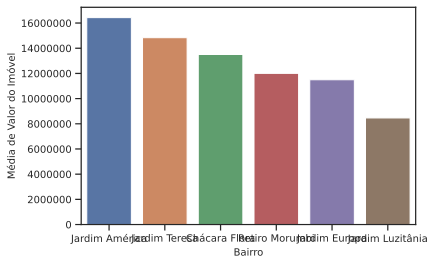

In [42]:
sns.barplot( x = top_6.index, y = top_6["Valor"])
plt.rcParams["figure.figsize"] = (10, 5)
plt.ylabel("Média de Valor do Imóvel",fontsize=10)
plt.xlabel("Bairro",fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ticklabel_format(axis="y", style='plain')
plt.show()

Também seria interessante fazer um gráfico de dispersão com a quantidade de quartos e o valor do imóvel. 

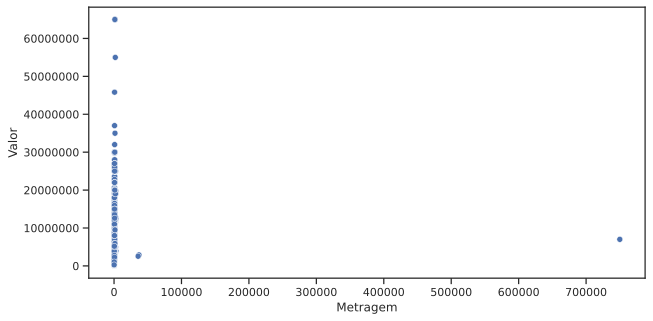

In [43]:
sns.scatterplot(x = df_vendas["Metragem"], y = df_vendas["Valor"])
plt.ticklabel_format(axis="y", style='plain')

Como há outlier na metragem e nos valores, vou filtrar os dados para se ter um gráfico mais interessante. Usei a estatística Z Score, que define um nível de distância da média dos dados e retirei do dataframe os dados que estão extremamente distantes da média de cada coluna.

In [44]:
from scipy import stats
import numpy as np

df_vendas = df_vendas[(np.abs(stats.zscore(df_vendas["Metragem"])) < 3)]
df_vendas = df_vendas[(np.abs(stats.zscore(df_vendas["Valor"])) < 3)]
df_vendas = df_vendas[(np.abs(stats.zscore(df_vendas["Banheiros"])) < 3)]

Como era esperado, parece haver uma correlação positiva entre o tamanho da residência e o valor, com a linha vermelha representando a reta de regressão dos dados.

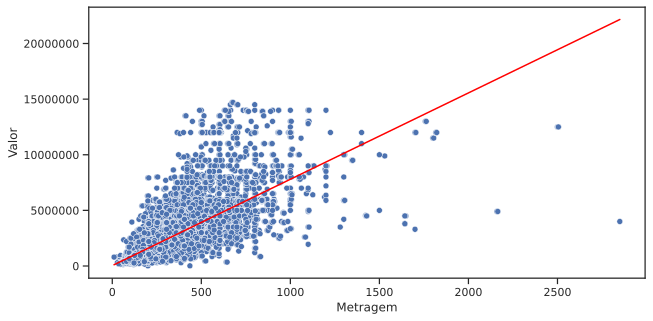

In [45]:
sns.scatterplot(x = df_vendas["Metragem"], y = df_vendas["Valor"])
plt.ticklabel_format(axis="y", style='plain')
m, b = np.polyfit(df_vendas["Metragem"], df_vendas["Valor"], 1)
plt.plot(df_vendas["Metragem"], m*df_vendas["Metragem"]+b, color = "red")


Pode-se fazer um gráfico de dispersão com outras variáveis, além da metragem, como, por exemplo, a quantidade de banheiros.

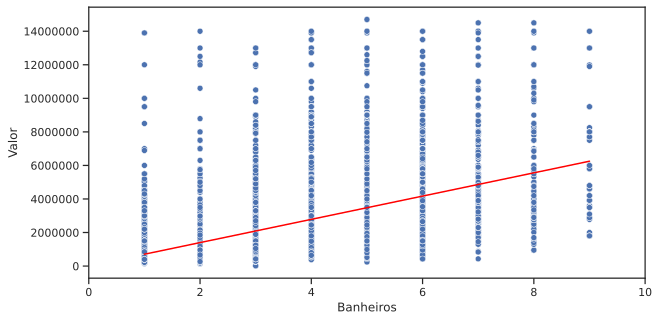

In [46]:
sns.scatterplot(x = df_vendas["Banheiros"], y = df_vendas["Valor"])
plt.ticklabel_format(axis="y", style='plain')
plt.xlim(0,df_vendas["Banheiros"].max()+1)
m, b = np.polyfit(df_vendas["Banheiros"], df_vendas["Valor"], 1)
plt.plot(df_vendas["Banheiros"], m*df_vendas["Banheiros"]+b, color = "red")

# 4) Outras estatísticas de dados

A mediana de metragem de cada bairro, ou seja, o exato valor do meio do tamanho por bairro.

In [47]:
df_vendas.groupby("Bairro")[["Metragem"]].median()

Metragem
Bairro                     
Aclimação             220.0
Alto da Boa Vista     378.0
Alto da Lapa          265.0
Alto da Mooca         182.5
Alto de Pinheiros     402.0
...                     ...
Vila Água Funda       143.0
Água Branca           171.5
Água Fria             174.5
Água Funda            139.0
Água Rasa             180.0

[696 rows x 1 columns]

O valor máximo de imóvel por bairro. Jardim América tem o imóvel mais caro da amostragem, custando R$ 65.000.000.

In [48]:
df_vendas.groupby("Bairro")[["Valor"]].max().sort_values(by = "Valor",ascending = False)

Valor
Bairro                         
Jardim Paulista      14700000.0
Jardim América       14500000.0
Pinheiros            14500000.0
Jardim Paulistano    14000000.0
Jardim Europa        14000000.0
...                         ...
Jardim São José        213850.0
Jardim Benfica         199900.0
Vila Cardoso Franco    180000.0
Jardim Morais Prado    180000.0
Vila Aurea             165000.0

[696 rows x 1 columns]

# 5) Bairros que não tem nome de rua.

Usando a função "isnull()" é simples retirar os bairros que possuem alguma rua sem nome, ou nulo.

In [49]:
df_vendas[["Bairro"]][df["Rua"].isnull() == True]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Bairro
3                       Jardim Morumbi
11                    Jardim Luzitânia
31                      Parque da Lapa
56    Chácara Santo Antônio (Zona Sul)
57                      Jardim Guedala
...                                ...
9963                 Jardim Petrópolis
9989              Parque Alves de Lima
9991                      Vila Formosa
9995                     Jardim Leonor
9999                 Jardim Petrópolis

[2918 rows x 1 columns]

# Aula 2



# 1) e 2) Escala de valores em milhões e Gráfico do Histograma

Usando a função ticklabel_format é fácil colocar a escala de valores sem a notação científica. No entanto, o valor com vários zeros no eixo x é de difícil leitura.

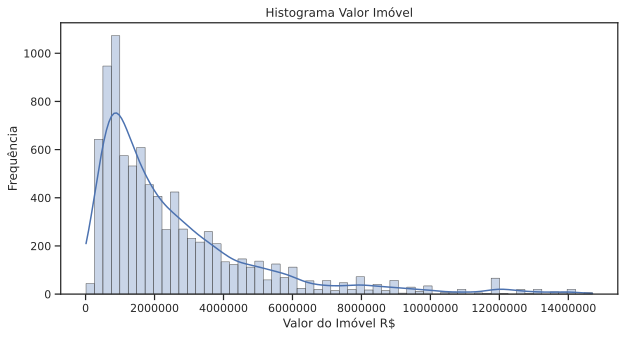

In [50]:
sns.set_theme(style="ticks")
g = sns.histplot(df_vendas["Valor"],alpha = 0.30, kde = True,  multiple="stack", palette="light:m_r", edgecolor=".3",linewidth=.5)

plt.ticklabel_format(axis="x", style='plain')
plt.ylabel("Frequência", fontsize = 12)
plt.xlabel("Valor do Imóvel R$", fontsize = 12)
plt.rcParams["figure.figsize"] = (10, 5)
plt.title("Histograma Valor Imóvel")


plt.show()

Utilizei uma função do site "https://stackoverflow.com/questions/53747298/how-to-format-seaborn-matplotlib-axis-tick-labels-from-number-to-thousands-or-mi" para transformar os valores de milhões com vários zeros para 2m, ou 4m, tornando mais fácil o entendimento.

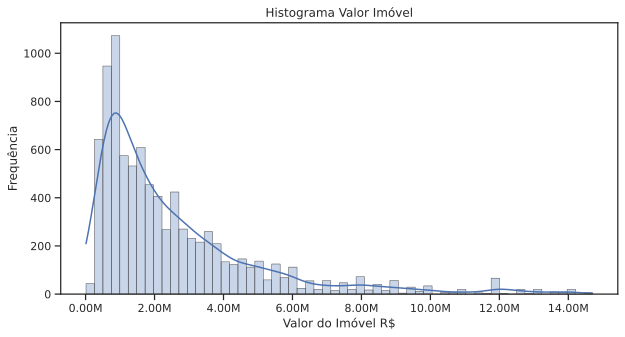

In [51]:
sns.set_theme(style="ticks")
g = sns.histplot(df_vendas["Valor"],alpha = 0.30, kde = True,  multiple="stack", palette="light:m_r", edgecolor=".3",linewidth=.5)


plt.ylabel("Frequência", fontsize = 12)
plt.xlabel("Valor do Imóvel R$", fontsize = 12)
plt.rcParams["figure.figsize"] = (10, 5)
plt.title("Histograma Valor Imóvel")
plt.ticklabel_format(axis="x", style='plain')

xlabels = ['{:,.2f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels)

plt.show()

# 3) Preço do metro quadrado por bairro e gráfico

In [52]:
df_vendas["Preço por Metro Quadrado"] = df_vendas["Valor"] / df_vendas["Metragem"]
df_vendas[["Preço por Metro Quadrado"]]

Preço por Metro Quadrado
0                   7000.000000
1                   7459.677419
2                   3040.000000
3                   2209.677419
4                   5400.000000
...                         ...
10002               5617.977528
10003               7000.000000
10004               3801.652893
10005               5121.951220
10007               2213.114754

[8883 rows x 1 columns]

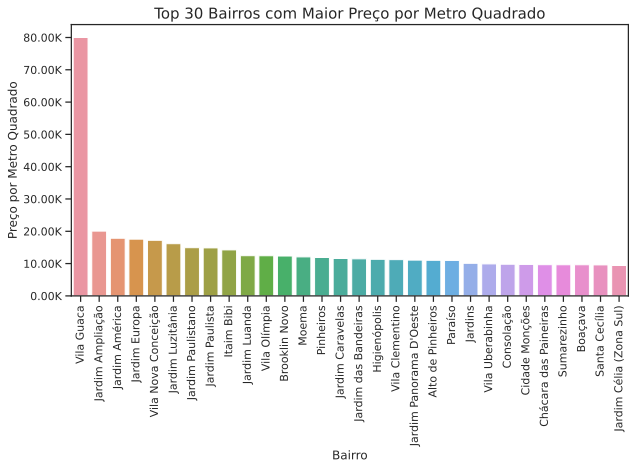

In [53]:
group = df_vendas.groupby("Bairro")[["Preço por Metro Quadrado"]].mean().sort_values(by = "Preço por Metro Quadrado",ascending = False).head(30)
barchart = sns.barplot(x = group.index, y = group["Preço por Metro Quadrado"])
plt.xticks(Rotation = 90)

ylabels = ['{:,.2f}'.format(x) + 'K' for x in barchart.get_yticks()/1000]
barchart.set_yticklabels(ylabels)
plt.title("Top 30 Bairros com Maior Preço por Metro Quadrado", fontsize = 15)

plt.show()


# 4) Exploração das bibliotecas de visualizações e conclusões

Para esse desafio, resolvi usar a galeria Galeritas com a função ECDF. 
Basicamente, esse tipo de gráfico pode ser interpretado da seguinte forma: o valor no eixo Y é a porcentagem dos dados que atendem às informações no eixo X. Por exemplo, no eixo Y, no ponto 0.8, há um valor correspondente na curva em torno de 10 mil no eixo X. Ou seja, 80% dos dados do dataframe tem o preço de até 10k por metro quadrado.

In [54]:
pip install galeritas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


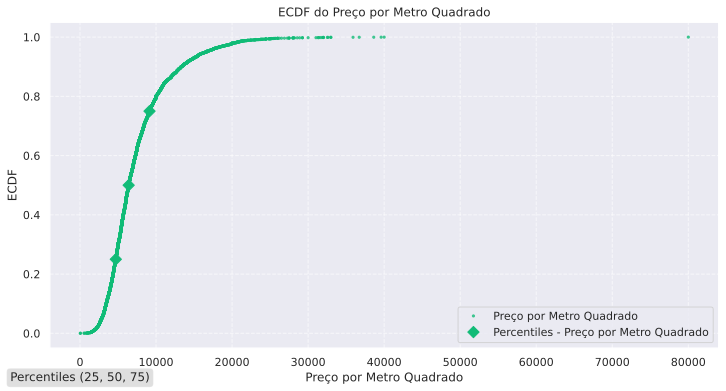

In [55]:
from galeritas import plot_ecdf_curve

ecdf_curv = plot_ecdf_curve( df_vendas, column_to_plot='Preço por Metro Quadrado', figsize=(12, 6), plot_title='ECDF do Preço por Metro Quadrado')

plt.ticklabel_format(axis="x", style='plain')

# 5) Visualização para analisar os quartis, mediana e outliers

A visualização mais adequada para conseguir essas informações é o que se chama de boxplot.

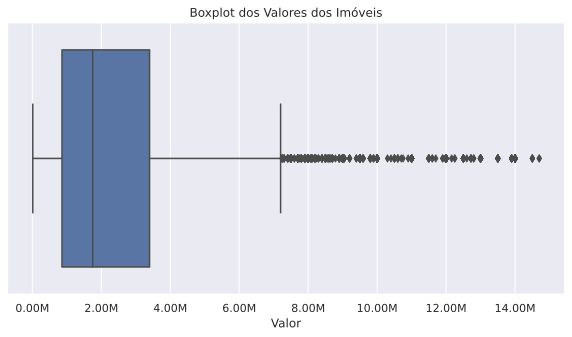

In [56]:
boxchart = sns.boxplot(x = df_vendas["Valor"], orient="h")
plt.ticklabel_format(axis="x", style='plain')

xlabels = ['{:,.2f}'.format(x) + 'M' for x in boxchart.get_xticks()/1000000]
boxchart.set_xticklabels(xlabels)
plt.title("Boxplot dos Valores dos Imóveis")
plt.show()

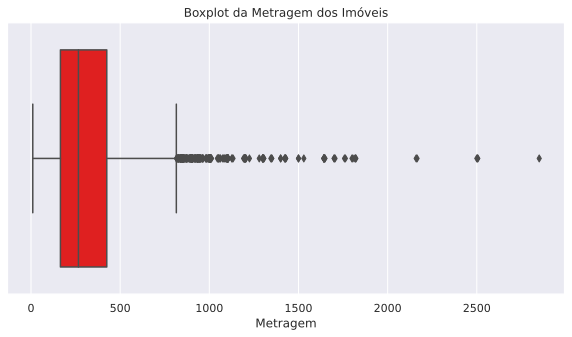

In [57]:
boxchart = sns.boxplot(x = df_vendas["Metragem"], color = "red")
plt.ticklabel_format(axis="x", style='plain')
plt.title("Boxplot da Metragem dos Imóveis")
plt.show()

# Aula 3

1) Vinculação dos dados do IBGE com o dataset de Imóveis

In [58]:
df_vendas.head()

Rua              Bairro     Cidade  Metragem  \
0           Avenida Itacira, 255    Planalto Paulista  São Paulo      1000   
1  Rua Aurelia Perez Alvarez, 42   Jardim dos Estados  São Paulo       496   
2                 Rua Alba Valdez     Jardim Reimberg  São Paulo       125   
3                             NaN      Jardim Morumbi  São Paulo       310   
4        Rua Tobias Barreto, 195                Mooca  São Paulo       100   

   Quartos  Banheiros  Vagas      Valor Tipo de Anúncio  \
0        4          8      6  7000000.0            None   
1        4          4      4  3700000.0            None   
2        4          3      2   380000.0            None   
3        3          2      4   685000.0            None   
4        3          2      2   540000.0            None   

   Preço por Metro Quadrado  
0               7000.000000  
1               7459.677419  
2               3040.000000  
3               2209.677419  
4               5400.000000

In [97]:
df_ibge = pd.read_csv("https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv",sep = ";" , encoding =  "cp1252")


In [98]:
df_ibge.head()

Cod_setor  Cod_Grandes Regiï¿½es Nome_Grande_Regiao  Cod_UF  \
0  355030801000001                      3   Regiï¿½o Sudeste      35   
1  355030801000002                      3   Regiï¿½o Sudeste      35   
2  355030801000003                      3   Regiï¿½o Sudeste      35   
3  355030801000004                      3   Regiï¿½o Sudeste      35   
4  355030801000005                      3   Regiï¿½o Sudeste      35   

   Nome_da_UF   Cod_meso                  Nome_da_meso  Cod_micro  \
0  Sï¿½o Paulo      3515  Metropolitana de Sï¿½o Paulo      35061   
1  Sï¿½o Paulo      3515  Metropolitana de Sï¿½o Paulo      35061   
2  Sï¿½o Paulo      3515  Metropolitana de Sï¿½o Paulo      35061   
3  Sï¿½o Paulo      3515  Metropolitana de Sï¿½o Paulo      35061   
4  Sï¿½o Paulo      3515  Metropolitana de Sï¿½o Paulo      35061   

  Nome_da_micro  Cod_RM  ...  V004     V005        V006     V007        V008  \
0   Sï¿½o Paulo      20  ...  2,32  2091,32  8532451,78  2164,55  8673276,78   
1   Sï¿½o Paulo      20  ...  2,09  1650,09  3983441,31  1717,44  4030519,99   
2   Sï¿½o Paulo      20  ...  3,08  1280,43  5474593,06  2349,53  7553913,02   
3   Sï¿½o Paulo      20  ...  2,26  1119,59   3572955,1  1859,13   4567289,5   
4   Sï¿½o Paulo      20  ...  2,35   1416,9  2240207,58  1581,66  2240109,39   

      V009        V010     V011        V012  Unnamed: 33  
0  1227,41  4285771,99  1713,75  5152087,86          NaN  
1  1045,78  2572133,32  1468,08  2991546,94          NaN  
2   902,97  2735492,52  1786,79  3837674,74          NaN  
3   869,09  2122409,02  1567,41  2735383,24          NaN  
4   917,71  1570047,75  1356,35  1725877,85          NaN  

[5 rows x 34 columns]